In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = 'datafiles/raw_pulses/feb_5_run_1_pulse_1.csv'

In [3]:
SM_P_NS = 0.5
dt = 1/SM_P_NS
trig_level = 40

# Open DataFrame

In [4]:
df = pd.read_csv(path, sep=',', index_col=0).astype(float)
df['Energy']= df['Voltage'].cumsum()/dt

Find the trigger time.

In [5]:
i = np.argmax(df['Voltage']>trig_level)

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


# Do Plots

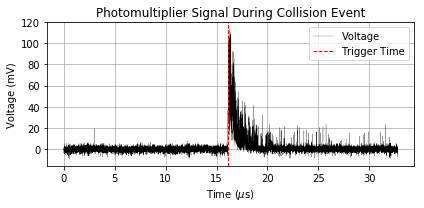

In [7]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(df.index/1000, df['Voltage'], lw=0.2, color='k')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Voltage (mV)')
ax.grid()

ax.axvline(i/1000, color='r', ls='--', lw=1, label='Trigger Time')
ax.legend(loc='best')
ax.set_title('Photomultiplier Signal During Collision Event')

fig.tight_layout()
plt.savefig('plots/report_plots/sample_pulse.png', dpi=300)
plt.show()

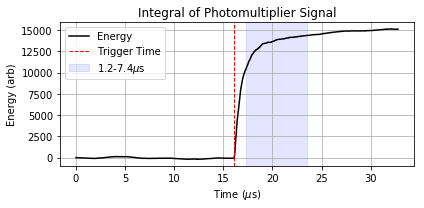

In [8]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(df.index/1000, df['Energy'], color='k')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Energy (arb)')
ax.grid()

ax.axvline(i/1000, color='r', ls='--', lw=1, label='Trigger Time')
ax.axvspan(i/1000+1.2, i/1000+7.4, alpha=0.1, color='blue', label='1.2-7.4$\mu$s')

ax.set_title('Integral of Photomultiplier Signal')
ax.legend(loc='best')

fig.tight_layout()
plt.savefig('plots/report_plots/sample_pulse_integral.png', dpi=300)
plt.show()